In [21]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import imageio
import os

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Transformar imagenes a escala de grises 

x_train = x_train / 255.0


In [6]:
# Tranfsormar etiquetas a valores del 0-9 con one hot encoding

y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

In [7]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    x_train,
    y_train_oh,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9226 - loss: 0.2668 - val_accuracy: 0.9574 - val_loss: 0.1488
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1098 - val_accuracy: 0.9617 - val_loss: 0.1280
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9765 - loss: 0.0779 - val_accuracy: 0.9703 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9742 - val_loss: 0.0945
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9851 - loss: 0.0460 - val_accuracy: 0.9765 - val_loss: 0.0908
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.9724 - val_loss: 0.1038
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9747 - val_loss: 0.1025
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0254 - 

In [10]:
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


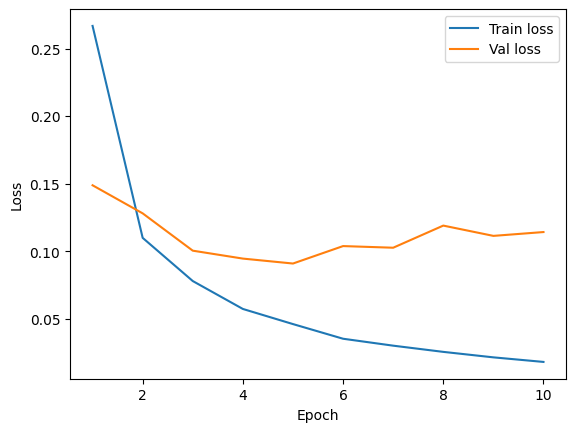

In [11]:
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], label='Train loss')
plt.plot(epochs, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

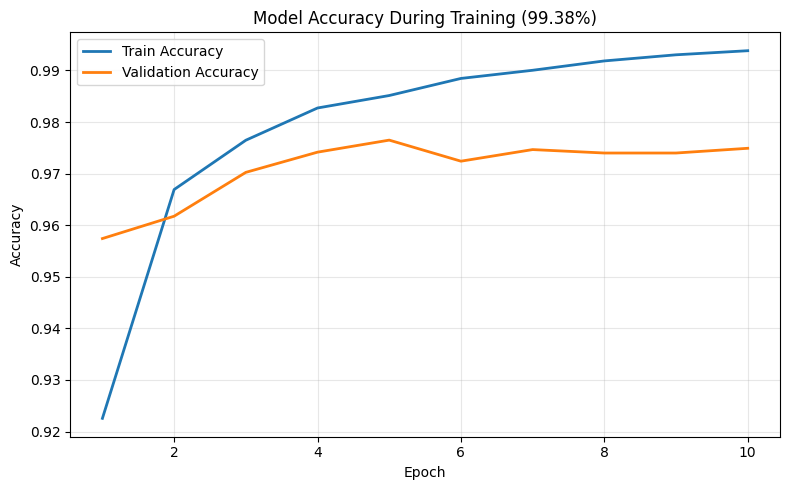

In [38]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,5))

plt.plot(epochs, history.history['accuracy'], linewidth=2, label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], linewidth=2, label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f"Model Accuracy During Training ({final_train_acc*100:.2f}%)")
plt.legend()
plt.grid(alpha=0.3)


final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]


plt.tight_layout()

# Guardar imagen en alta calidad
plt.savefig("mnist_training_accuracy.png", dpi=300, bbox_inches="tight")

plt.show()


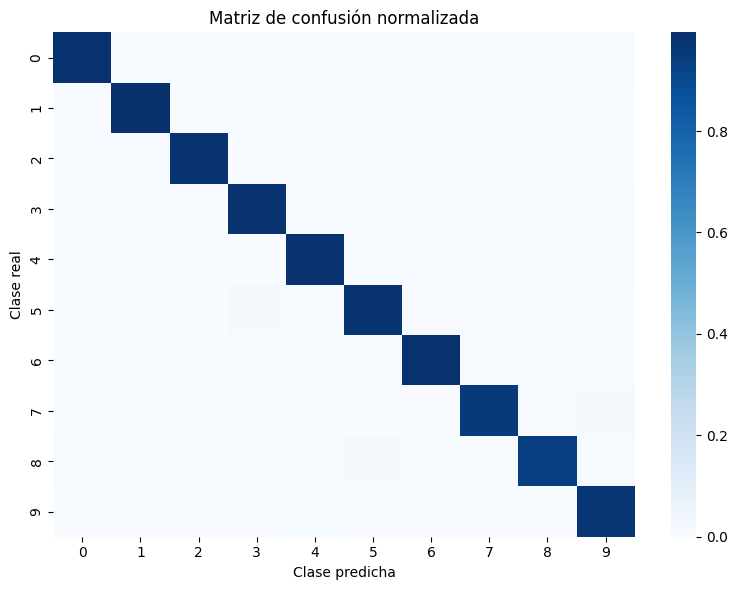

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Asegurar que y_test no esté en one-hot ---
if len(y_test.shape) > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# --- Asegurar que y_pred esté en etiquetas ---
if len(y_pred.shape) > 1:
    y_pred_labels = np.argmax(y_pred, axis=1)
else:
    y_pred_labels = y_pred

# --- Calcular matriz de confusión ---
cm = confusion_matrix(y_true, y_pred_labels)

# Normalizar por fila
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

# Etiquetas
labels = [str(i) for i in range(10)]

# --- Visualización ---
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.title("Matriz de confusión normalizada")
plt.tight_layout()
plt.show()


In [14]:


# Calculate metrics
report = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the metrics table
metrics_df = pd.DataFrame(report).transpose()

# Display the table
print("Metrics Table:")
display(metrics_df)


Metrics Table:


,precision,recall,f1-score,support
0,0.982688,0.984694,0.983690,980.0000
1,0.988616,0.994714,0.991656,1135.0000
2,0.977713,0.977713,0.977713,1032.0000
3,0.962062,0.979208,0.970559,1010.0000
4,0.972755,0.981670,0.977192,982.0000
5,0.962472,0.977578,0.969967,892.0000
6,0.976166,0.983299,0.979719,958.0000
7,0.985015,0.959144,0.971907,1028.0000
8,0.984946,0.940452,0.962185,974.0000
9,0.958944,0.972250,0.965551,1009.0000


In [15]:
sample_indices = np.random.choice(len(x_test), 10, replace =False)

sample_images = x_test[sample_indices]

sample_labels = y_test[sample_indices]

In [23]:
figures = []

output_dir = "./results"
os.makedirs(output_dir, exist_ok=True)

for i, img in enumerate(sample_images):
    plt.figure(figsize=(2,2))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis('off')

    img_input = img.astype("float32") / 255.0
    img_input = img_input.reshape(1,28,28,1)

    pred = np.argmax(model.predict(img_input), axis=1)[0]

    plt.title(f"Predicciín: {pred}")

    fig_path = os.path.join(output_dir, f"digit_{i}.png")

    plt.savefig(fig_path)
    plt.close()
    figures.append(fig_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
with imageio.get_writer('mnist_predictions.gif', mode="I", duration=1.5) as writer:
    for filename in figures:
        image = imageio.imread(filename)
        writer.append_data(image)

C:\Users\xavif\AppData\Local\Temp\ipykernel_23368\1853334276.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import imageio

# --- Selección de dígitos de prueba ---
num_digits = 10  # cuántos dígitos mostrar
sample_indices = np.random.choice(len(x_test), num_digits, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

frames = []

for img, true_label in zip(sample_images, sample_labels):
    # Normalizar y reshape para el modelo
    img_input = img.astype("float32") / 255.0
    img_input = img_input.reshape(1,28,28,1)
    
    # Predicción
    pred_probs = model.predict(img_input)[0]
    pred_label = np.argmax(pred_probs)
    
    # Crear figura
    fig, axes = plt.subplots(1,2, figsize=(5,2.5))
    
    # --- Imagen del dígito ---
    axes[0].imshow(img.squeeze(), cmap='gray')
    axes[0].axis('off')
    title_color = "blue" if pred_label == true_label else "red"
    axes[0].set_title(f"Real: {true_label}  Pred: {pred_label}", color=title_color, fontsize=12)
    
    # --- Barra de probabilidades ---
    axes[1].bar(range(10), pred_probs, color='blue')
    axes[1].set_xticks(range(10))
    axes[1].set_xlabel("Dígito")
    axes[1].set_ylabel("Confianza")
    axes[1].set_ylim([0,1])
    axes[1].set_title("Probabilidades del modelo", fontsize=10)
    
    plt.tight_layout()
    
    # Guardar frame en memoria
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    frame = Image.open(buf)
    frames.append(frame)

# --- Crear GIF ---
frames[0].save(
    'mnist_predictions.gif',
    format='GIF',
    append_images=frames[1:],
    save_all=True,
    duration=800,   # milisegundos por frame
    loop=0
)

print("GIF generado: mnist_predictions.gif")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
GIF generado: mnist_predictions.gif


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import imageio

# Número de dígitos a mostrar
num_digits = 10
sample_indices = np.random.choice(len(x_test), num_digits, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

frames = []

# Fuente para los títulos (opcional)
try:
    font = ImageFont.truetype("arial.ttf", 16)
except:
    font = None  # usa default si no hay Arial

for img, true_label in zip(sample_images, sample_labels):
    # Normalizar para el modelo
    img_input = img.astype("float32") / 255.0
    img_input = img_input.reshape(1,28,28,1)
    pred_probs = model.predict(img_input)[0]
    pred_label = np.argmax(pred_probs)
    
    # Animación: barras crecen de 0 al valor real en 5 pasos
    steps = 5
    for step in range(1, steps+1):
        fig, axes = plt.subplots(1,2, figsize=(6,3))
        
        # Fondo oscuro
        fig.patch.set_facecolor("black")
        axes[0].imshow(img.squeeze(), cmap='gray')
        axes[0].axis('off')
        axes[0].set_facecolor("black")
        title_color = "lime" if pred_label == true_label else "red"
        axes[0].set_title(f"Real: {true_label}  Pred: {pred_label}", color=title_color, fontsize=12)
        
        # Barras de probabilidad animadas
        axes[1].bar(range(10), pred_probs*step/steps, color='orange')
        axes[1].set_xticks(range(10))
        axes[1].set_ylim([0,1])
        axes[1].set_xlabel("Dígito")
        axes[1].set_ylabel("Confianza")
        axes[1].set_title("Probabilidades", color="white", fontsize=10)
        axes[1].tick_params(colors='white')
        axes[1].spines['bottom'].set_color('white')
        axes[1].spines['top'].set_color('white') 
        axes[1].spines['right'].set_color('white')
        axes[1].spines['left'].set_color('white')
        
        plt.tight_layout()
        
        # Guardar frame en memoria
        buf = BytesIO()
        plt.savefig(buf, format='png', facecolor=fig.get_facecolor())
        plt.close(fig)
        buf.seek(0)
        frame = Image.open(buf)
        frames.append(frame)

# Guardar GIF
frames[0].save(
    "mnist_predictions_animated.gif",
    format="GIF",
    append_images=frames[1:],
    save_all=True,
    duration=500,  # 0.5 segundos por frame
    loop=0
)

print("GIF generado: mnist_predictions_animated.gif")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
GIF generado: mnist_predictions_animated.gif


In [29]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Predicciones del modelo
y_pred_probs = model.predict(x_test.astype("float32") / 255.0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Si y_test está en formato one-hot, convertirlo
if len(y_test.shape) > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Métricas
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Precision (weighted): {precision_weighted:.4f}")


plt.figure(figsize=(6,3))
plt.axis('off')

text = f"""
MNIST Model Performance

Accuracy: {accuracy:.4f}
Precision (macro): {precision_macro:.4f}
Precision (weighted): {precision_weighted:.4f}
"""

plt.text(0.5, 0.5, text, ha='center', va='center', fontsize=14)
plt.title("Model Evaluation", fontsize=16)

plt.savefig("mnist_metrics.png", bbox_inches='tight')
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>